In [83]:
# install.packages("xts")

In [84]:
# libraries
library(readxl)
options(warn = 0)
library(dplyr)
library(ggplot2)
library(caTools)
library(caret)
library(GGally)
library(janitor)
library(corrplot)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(neuralnet)
library(xts)

In [85]:
df <- read_excel("data/UOW_load.xlsx")
#add index column to data frame
df$index <- 1:nrow(df)
head(df)

Dates,09:00,10:00,11:00,index
<dttm>,<dbl>,<dbl>,<dbl>,<int>
2018-01-01,89.4,90.6,88.6,1
2018-01-02,108.2,104.6,106.0,2
2018-01-03,110.0,111.6,114.8,3
2018-01-04,106.4,104.4,109.0,4
2018-01-05,97.8,100.4,102.4,5
2018-01-06,87.0,90.8,87.2,6


In [86]:
df$Dates<-as.Date(df$Dates)

In [87]:
names(df)[2] <- paste("ninth_hour")
names(df)[3] <- paste("tenth_hour")
names(df)[4] <- paste("eleventh_hour")
head(df)

Dates,ninth_hour,tenth_hour,eleventh_hour,index
<date>,<dbl>,<dbl>,<dbl>,<int>
2018-01-01,89.4,90.6,88.6,1
2018-01-02,108.2,104.6,106.0,2
2018-01-03,110.0,111.6,114.8,3
2018-01-04,106.4,104.4,109.0,4
2018-01-05,97.8,100.4,102.4,5
2018-01-06,87.0,90.8,87.2,6


In [88]:
summary(df[2:4])

   ninth_hour       tenth_hour     eleventh_hour   
 Min.   : 50.40   Min.   : 49.20   Min.   : 48.20  
 1st Qu.: 81.55   1st Qu.: 83.00   1st Qu.: 84.75  
 Median : 97.50   Median :102.80   Median :105.40  
 Mean   : 95.35   Mean   : 99.63   Mean   :102.83  
 3rd Qu.:110.60   3rd Qu.:116.05   3rd Qu.:120.90  
 Max.   :141.20   Max.   :148.80   Max.   :156.40  

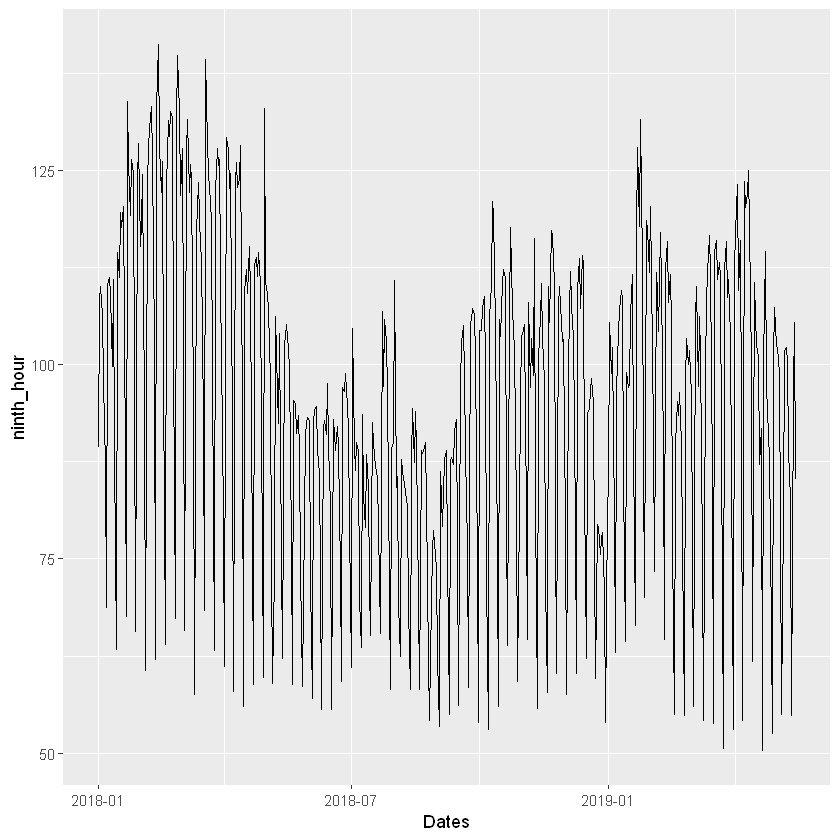

In [89]:
library(ggplot2)

#create time series plot
p <- ggplot(df, aes(x=Dates, y=ninth_hour)) +
       geom_line()

#display time series plot
p

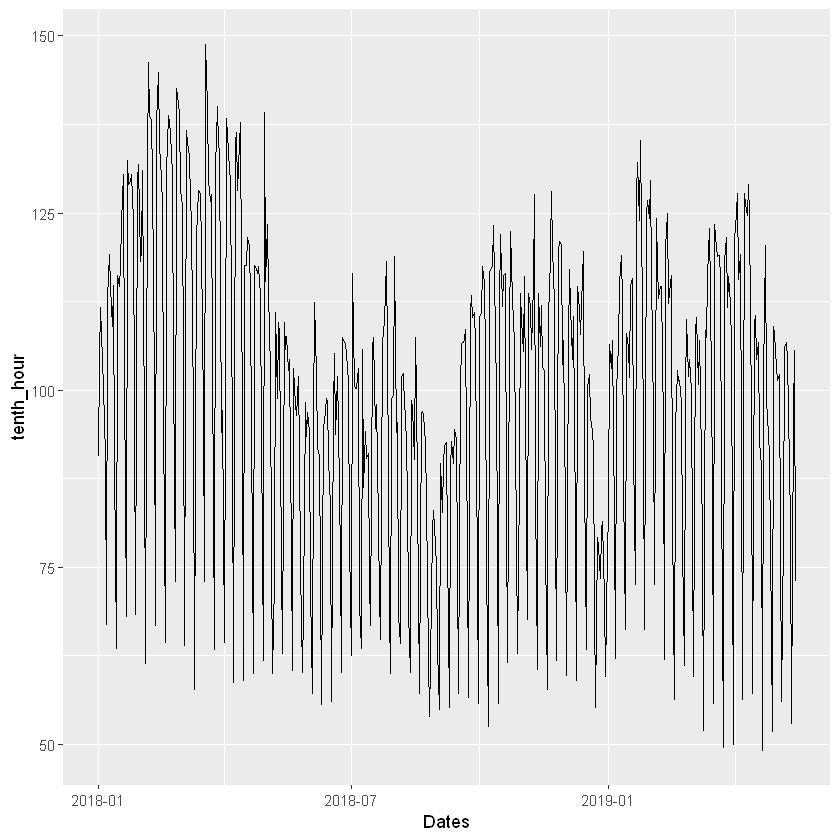

In [90]:
library(ggplot2)

#create time series plot
p <- ggplot(df, aes(x=Dates, y=tenth_hour)) +
       geom_line()

#display time series plot
p

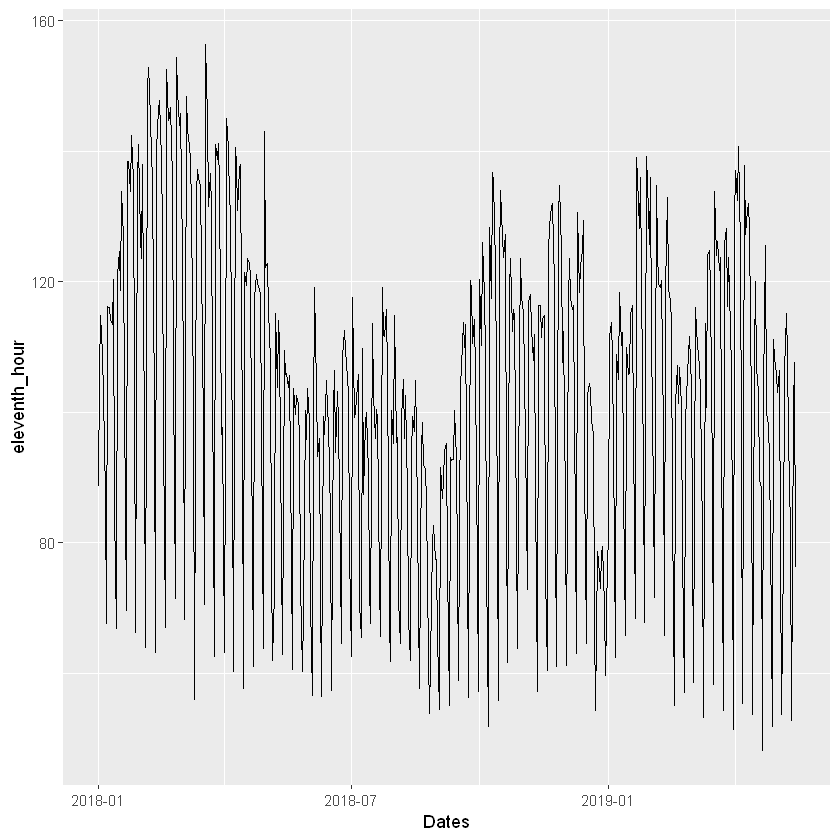

In [91]:
library(ggplot2)

#create time series plot
p <- ggplot(df, aes(x=Dates, y=eleventh_hour)) +
       geom_line()

#display time series plot
p

In [92]:
# insert all the inputs to the one data frame
df_full = df %>%
 mutate(
     previous_one_day_ninth_hour = lag(df$ninth_hour,1),
    previous_one_day_tenth_hour = lag(df$tenth_hour,1),
    previous_one_day_eleventh_hour = lag(df$eleventh_hour,1))
#  five_day_rolling = rollmean(usd_eur,5, fill = NA),
#  ten_day_rolling = rollmean(usd_eur,10, fill = NA)) %>%


# drop_na()

In [93]:
head(df_full)

Dates,ninth_hour,tenth_hour,eleventh_hour,index,previous_one_day_ninth_hour,previous_one_day_tenth_hour,previous_one_day_eleventh_hour
<date>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2018-01-01,89.4,90.6,88.6,1,NA,NA,NA
2018-01-02,108.2,104.6,106.0,2,89.4,90.6,88.6
2018-01-03,110.0,111.6,114.8,3,108.2,104.6,106.0
2018-01-04,106.4,104.4,109.0,4,110.0,111.6,114.8
2018-01-05,97.8,100.4,102.4,5,106.4,104.4,109.0
2018-01-06,87.0,90.8,87.2,6,97.8,100.4,102.4


In [94]:
df_full=(drop_na(df_full))

In [95]:
df_full <- scale(df_full[c(2,3,4,6,7,8)])

In [96]:
dim(df_full)

[1] 499   6

In [97]:
head(df_full)

ninth_hour,tenth_hour,eleventh_hour,previous_one_day_ninth_hour,previous_one_day_tenth_hour,previous_one_day_eleventh_hour
0.6116227,0.21581140,0.12423934,-0.2844228,-0.39604456,-0.56524125
0.6973717,0.52073382,0.47221728,0.6113161,0.21453215,0.12335507
0.5258737,0.20709933,0.24286819,0.6970783,0.51982050,0.47161068
0.1161841,0.03285794,-0.01811527,0.5255539,0.20580962,0.24207857
-0.3983099,-0.38532137,-0.61916807,0.1158010,0.03135914,-0.01911314
-1.2653275,-1.42205760,-1.39420984,-0.3987724,-0.38732203,-0.62064555


In [98]:
df_train=df_full[1:400,]
df_test  =df_full[401:nrow(df_full),]

In [99]:
# fit neural network
nn=neuralnet(eleventh_hour~ninth_hour+tenth_hour,data=df_train[,c(1,2,3)], 
            hidden=10,
            linear.output = TRUE)

In [100]:
plot(nn)

In [101]:
summary(nn)

                    Length Class      Mode    
call                  5    -none-     call    
response            400    -none-     numeric 
covariate           800    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  3    data.frame list    
exclude               0    -none-     NULL    
net.result            1    -none-     list    
weights               1    -none-     list    
generalized.weights   1    -none-     list    
startweights          1    -none-     list    
result.matrix        44    -none-     numeric 

In [102]:
## Prediction using neural network
Predict=compute(nn,df_test[,c(1,2)])
# Predict$net.result

In [103]:
str(Predict)

List of 2
 $ neurons   :List of 2
  ..$ : num [1:99, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:3] "" "ninth_hour" "tenth_hour"
  ..$ : num [1:99, 1:11] 1 1 1 1 1 1 1 1 1 1 ...
 $ net.result: num [1:99, 1] 0.555 0.727 0.681 -0.24 -1.591 ...


In [104]:
set.seed(12345)
# two layer neural network
model_two_hidden_layers = function(input_set,first_hidden_layer_neurons,secoend_hidden_layer_neurons,activation_fun) {
#nuerel network architechure    
autoregressive_nn = neuralnet(eleventh_hour ~ input_set,
data=df_train, hidden=c(first_hidden_layer_neurons,secoend_hidden_layer_neurons), linear.output=TRUE,act.fct=activation_fun)

# train_results = compute(nn_model_true,gbp_test_data[,3:4])

# truthcol = gbp_exchange_full[401:491,3]$usd_eur

# predcol = unnormalize(train_results$net.result,gbp_min_train_data,
# gbp_max_train_data)[,1]
# relevant_pred_stat(truthcol,predcol,
# "Two Hidden Layers") %>%
# mutate(hiddel_layers = paste0(hidden, " and ",sec_hidden),
# input_set = "A") %>%
# filter(.metric != "rsq")
}

In [118]:
autoregressive_nn = neuralnet(eleventh_hour ~ ninth_hour+tenth_hour,
data=df_train, hidden=c(5,5), linear.output=TRUE,act.fct="logistic")

In [119]:
train_results = compute(autoregressive_nn,df_test[,c(1,2)])

In [127]:
truthcol = df_test$eleventh_hour

ERROR: Error in df_test$eleventh_hour: $ operator is invalid for atomic vectors


In [125]:
truthcol

[1] 0.7259547